In [2]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 195.7 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/300.2 kB 456.6 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 697.2 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 737.3 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 718.0 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 805.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import speech_recognition as sr
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import joblib as j
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import os

In [2]:
vector=j.load(r'C:\Users\Shweta\Desktop\CDAC\PROJECT\Final Project\vectorizer.pkl')
model=j.load(r'C:\Users\Shweta\Desktop\CDAC\PROJECT\Final Project\model.pkl')

In [4]:
# Assuming you have 'vector' and 'model' defined elsewhere
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

def predict_mood(text):
    vec = vector.transform([text])
    result = model.predict(vec)[0]
    return result

def save_to_csv(data, filename='patient_data.csv'):
    df = pd.DataFrame(data)
    df.to_csv(filename, mode='a', header=not os.path.exists(filename), index=False)

def collect_patient_data():
    data = []
    for i in range(7):
        print(f"Day {i + 1}:")
        
        # Speech-to-text conversion
        r = sr.Recognizer()
        with sr.Microphone() as source:
            print("Please say something:")
            audio = r.listen(source)
            try:
                text = r.recognize_google(audio, language="en-US")
                print("You said: " + text)
                preprocessed_text = preprocess_text(text)
                print("preprocessedd: " + preprocessed_text)
                predicted_mood = predict_mood(preprocessed_text)
                print("predicted: " + predicted_mood)


            except sr.UnknownValueError:
                print("Google Speech Recognition could not understand your audio")
                text = ""
            except sr.RequestError as e:
                print("Could not request results from Google Speech Recognition service; {0}".format(e))
                text = ""
        
        # Preprocess text
        #preprocessed_text = preprocess_text(text)
        
        # Predict mood
        #predicted_mood = predict_mood(preprocessed_text)
        
        # Get current weekday
        day = input("Enter the day: ")
        
        # Append data
        data.append({'day': day, 'text': text, 'predicted_mood': predicted_mood})
    
    # Save to CSV
    save_to_csv(data)

# Collect and save patient data for seven days
collect_patient_data()


Day 1:
Please say something:
You said: I am not feeling but I am feeling upset
preprocessedd: feeling feeling upset
predicted: Depression
Day 2:
Please say something:
Google Speech Recognition could not understand your audio
Day 3:
Please say something:
You said: I am feeling depressed
preprocessedd: feeling depressed
predicted: Depression
Day 4:
Please say something:
You said: I am not in the mood to do anything I want to stress
preprocessedd: mood anything want stress
predicted: Depression
Day 5:
Please say something:
You said: I am feeling very happy today
preprocessedd: feeling happy today
predicted: happy
Day 6:
Please say something:
You said: I want to die I don't want to live
preprocessedd: want die n't want live
predicted: Suicidal
Day 7:
Please say something:
You said: abnormal
preprocessedd: abnormal
predicted: Normal


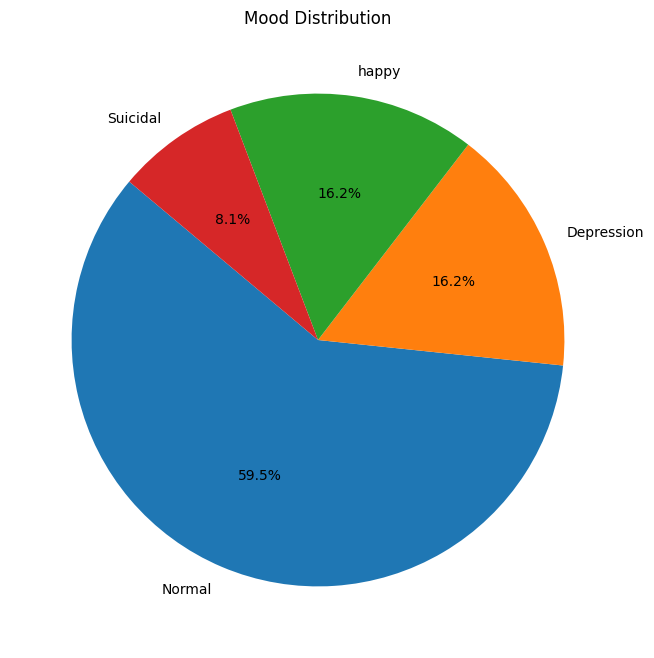

Most common mood: Normal
The patient is in a normal mental state.
Recommendations:
- Keep up with your current routines and practices.
- Stay connected with friends and family to maintain social support.
- Regularly check in with yourself to ensure you’re managing stress effectively.


In [5]:
def visualize_and_assess(filename='patient_data.csv'):
    # Read the CSV file
    df = pd.read_csv(filename)

    # Count the occurrences of each mood
    mood_counts = df['predicted_mood'].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(mood_counts, labels=mood_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Mood Distribution')
    plt.show()

    # Determine the most common mood
    most_common_mood = mood_counts.idxmax()

    # Assess mental health and provide recommendations
    if most_common_mood == 'happy':
        health_status = 'The patient is fit.'
        recommendations = [
            'Continue engaging in activities that bring you joy.',
            'Maintain a healthy lifestyle with balanced nutrition and regular exercise.',
            'Consider setting new personal goals and challenges to stay motivated.'
        ]
    elif most_common_mood == 'Normal':
        health_status = 'The patient is in a normal mental state.'
        recommendations = [
            'Keep up with your current routines and practices.',
            'Stay connected with friends and family to maintain social support.',
            'Regularly check in with yourself to ensure you’re managing stress effectively.'
        ]
    elif most_common_mood == 'depression':
        health_status = 'The patient is depressed.'
        recommendations = [
            'Consider seeking support from a mental health professional.',
            'Engage in activities that you used to enjoy, even if it’s difficult.',
            'Reach out to trusted friends or family members for support and understanding.'
        ]
    elif most_common_mood == 'suicidal':
        health_status = 'The patient is not in a healthy mental state.'
        recommendations = [
            'Seek immediate help from a mental health professional or counselor.',
            'Contact crisis support services or helplines for urgent assistance.',
            'Ensure you have a support network in place and communicate openly about your feelings.'
        ]
    else:
        health_status = 'Unknown mood state.'
        recommendations = [
            'Consider reviewing the mood prediction model for accuracy.',
            'Ensure proper data collection and preprocessing to improve predictions.',
            'Consult with a mental health professional to understand the implications of your data.'
        ]

    print(f'Most common mood: {most_common_mood}')
    print(health_status)
    print('Recommendations:')
    for suggestion in recommendations:
        print(f'- {suggestion}')

# Call the function to visualize and assess
visualize_and_assess()


In [6]:
df = pd.read_csv("patient_data.csv")

In [8]:
# Create the GUI window
root = tk.Tk()
root.title("Mental Health Dataset Visualization")

# Create a figure and canvas for the plot
fig = Figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(111)
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Define functions for each visualization
def plot_status_correlations():
    ax.clear()    
    weekday_status_matrix = df.pivot_table(index="text", columns="predicted_mood", aggfunc="size", fill_value=0)
    corr_matrix = weekday_status_matrix.corr()
    sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm',cbar=False)
    ax.set_title("Status Correlations")
    canvas.draw()
 
def plot_day_of_week_distribution():
    ax.clear()
    df['day'].value_counts().plot(kind='bar', ax=ax)
    ax.set_title("Day of Week Distribution")
    canvas.draw()

def plot_status_over_time():
    ax.clear()
    df.groupby('day')['predicted_mood'].value_counts().unstack().plot(kind='line', ax=ax)
    ax.set_title("Status Over Time")
    canvas.draw()

def plot_word_cloud():
    ax.clear()
    wordcloud = WordCloud().generate(' '.join(df['text']))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title("Word Cloud")
    canvas.draw()

def plot_pie_chart():
    ax.clear()
    df['predicted_mood'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_title("Status Pie Chart")
    canvas.draw()

def plot_status_correlation():
    ax.clear()
    corr_matrix = pd.crosstab(df["predicted_mood"], df["predicted_mood"])
    sns.heatmap(corr_matrix, ax=ax, annot=True, cmap="coolwarm", square=True ,cbar=False )
    ax.set_title("Correlation Heatmap")
    canvas.draw()

def plot_line_graph():
    ax.clear()
    weekday_status_counts = df.groupby(["day", "predicted_mood"]).size().unstack()
    weekday_status_counts.plot(kind="bar", ax=ax)
    ax.set_title("Status Distribution by Weekday")
    ax.set_xlabel("Weekday")
    ax.set_ylabel("Count")
    ax.legend(title="Status")
    canvas.draw()

def plot_scoreboard():
    ax.clear()
    status_counts = df["predicted_mood"].value_counts()
    scoreboard = pd.DataFrame({
        "Status": status_counts.index,
        "Count": status_counts.values,
        "Percentage": (status_counts.values / len(df)) * 100
    })
    scoreboard["Rank"] = scoreboard["Count"].rank(ascending=False).astype(int)
    ax.axis('off')
    ax.table(cellText=scoreboard.values, colLabels=scoreboard.columns, loc="center")
    canvas.draw()


def plot_sentiment_analysis():
    ax.clear()
    sia = SentimentIntensityAnalyzer()
    sentiments = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
    ax.bar(range(len(sentiments)), sentiments)
    ax.set_xlabel("Text Index")
    ax.set_ylabel("Sentiment Score")
    ax.set_title("Sentiment Analysis")
    canvas.draw()

# Create buttons for each visualization
button_frame = tk.Frame(root)
button_frame.pack(side=tk.BOTTOM)

button1 = tk.Button(button_frame, text="Status Distribution", command=plot_status_correlations)
button1.pack(side=tk.LEFT)

button2 = tk.Button(button_frame, text="Day of Week Distribution", command=plot_day_of_week_distribution)
button2.pack(side=tk.LEFT)

button3 = tk.Button(button_frame, text="Status Over Time", command=plot_status_over_time)
button3.pack(side=tk.LEFT)

button4 = tk.Button(button_frame, text="Word Cloud", command=plot_word_cloud)
button4.pack(side=tk.LEFT)

button5 = tk.Button(button_frame, text="Pie Chart", command=plot_pie_chart)
button5.pack(side=tk.LEFT)

button6 = tk.Button(button_frame, text="Status Correlation", command=plot_status_correlation)
button6.pack(side=tk.LEFT)

button7 = tk.Button(button_frame, text="Line Graph", command=plot_line_graph)
button7.pack(side=tk.LEFT)

button8 = tk.Button(button_frame, text="Scoreboard", command=plot_scoreboard)
button8.pack(side=tk.LEFT)

button9 = tk.Button(button_frame, text="Sentiment Analysis", command=plot_sentiment_analysis)
button9.pack(side=tk.LEFT)

# Start the GUI event loop
root.mainloop()